In [1]:
!pip install scikit-fuzzy



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 kB 10.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894077 sha256=26e3ff383f43ff2fc18c7baa9f93a387031ea008b8d9697a42ed9e727ef33b19
  Stored in directory: /root/.cache/pip/wheels/4f/86/1b/dfd97134a2c8313e519bcebd95d3fedc7be7944db022094bc8
Successfully built scikit-fuzzy


Nivel de intensidad de la lámpara: 0.7200130817705092


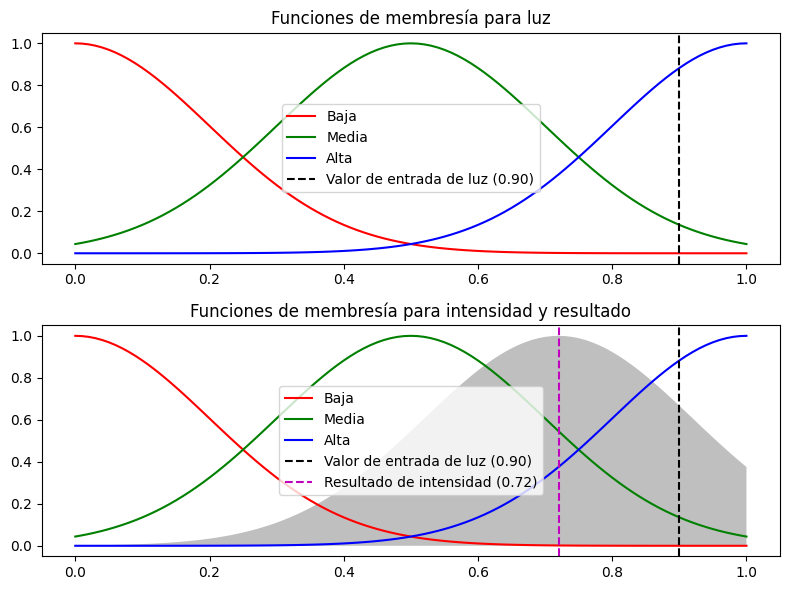

In [8]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

# Antecedentes y consecuentes
luz = ctrl.Antecedent(np.arange(0, 1.01, 0.01), 'luz')
intensidad = ctrl.Consequent(np.arange(0, 1.01, 0.01), 'intensidad')

# Funciones de membresía para la luz
luz['baja'] = fuzz.gaussmf(luz.universe, 0, 0.2)
luz['media'] = fuzz.gaussmf(luz.universe, 0.5, 0.2)
luz['alta'] = fuzz.gaussmf(luz.universe, 1, 0.2)

# Funciones de membresía para la intensidad
intensidad['baja'] = fuzz.gaussmf(intensidad.universe, 0, 0.2)
intensidad['media'] = fuzz.gaussmf(intensidad.universe, 0.5, 0.2)
intensidad['alta'] = fuzz.gaussmf(intensidad.universe, 1, 0.2)

# Reglas difusas
regla1 = ctrl.Rule(luz['baja'], intensidad['baja'])
regla2 = ctrl.Rule(luz['media'], intensidad['media'])
regla3 = ctrl.Rule(luz['alta'], intensidad['alta'])

# Sistema de control difuso
sistema_control = ctrl.ControlSystem([regla1, regla2, regla3])
controlador = ctrl.ControlSystemSimulation(sistema_control)

# Simulación con un valor de entrada para la luz (0.6)
valor_luz = 0.9
controlador.input['luz'] = valor_luz

# Computar el resultado
controlador.compute()

# Obtener el resultado para la intensidad
intensidad_resultado = controlador.output['intensidad']
print("Nivel de intensidad de la lámpara:", intensidad_resultado)

# Visualización de las funciones de membresía y la salida
fig, (ax0, ax1) = plt.subplots(nrows=2, figsize=(8, 6))

# Gráfico de funciones de membresía para luz
ax0.plot(luz.universe, fuzz.gaussmf(luz.universe, 0, 0.2), 'r', label='Baja')
ax0.plot(luz.universe, fuzz.gaussmf(luz.universe, 0.5, 0.2), 'g', label='Media')
ax0.plot(luz.universe, fuzz.gaussmf(luz.universe, 1, 0.2), 'b', label='Alta')
ax0.set_title('Funciones de membresía para luz')
ax0.axvline(x=valor_luz, color='k', linestyle='--', label=f'Valor de entrada de luz ({valor_luz:.2f})')
ax0.legend()

# Gráfico de funciones de membresía para intensidad
ax1.plot(intensidad.universe, fuzz.gaussmf(intensidad.universe, 0, 0.2), 'r', label='Baja')
ax1.plot(intensidad.universe, fuzz.gaussmf(intensidad.universe, 0.5, 0.2), 'g', label='Media')
ax1.plot(intensidad.universe, fuzz.gaussmf(intensidad.universe, 1, 0.2), 'b', label='Alta')
ax1.axvline(x=valor_luz, color='k', linestyle='--', label=f'Valor de entrada de luz ({valor_luz:.2f})')

# Marcar el centroide
ax1.axvline(x=intensidad_resultado, color='m', linestyle='--', label=f'Resultado de intensidad ({intensidad_resultado:.2f})')
ax1.fill_between(intensidad.universe, 0, fuzz.gaussmf(intensidad.universe, intensidad_resultado, 0.2), facecolor='gray', alpha=0.5)
ax1.set_title('Funciones de membresía para intensidad y resultado')
ax1.legend()

plt.tight_layout()
plt.show()


## Calculo de grado de pertenencia

Para calcular el grado de pertenencia a cada conjunto difuso, vamos a evaluar las funciones de membresía de luz en este valor de entrada y ver en qué medida pertenecen al conjunto difuso correspondiente.

Dado que tenemos tres conjuntos difusos (baja, media, alta), vamos a calcular el grado de pertenencia para cada uno.

Conjunto 'baja':

La función de membresía para 'baja' es una función gaussiana centrada en 0 con un ancho de 0.2.
Vamos a evaluar esta función gaussiana en el valor de entrada de luz de 0.9.
Utilizamos la fórmula de la función gaussiana:


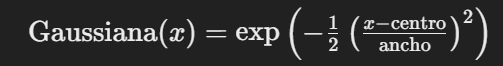

Conjunto 'baja':

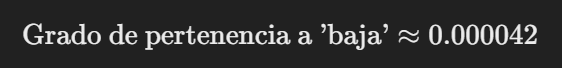

Conjunto 'media':

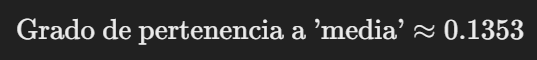

Conjunto 'alta':

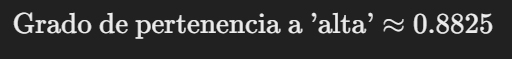

La diferencia entre el mayor grado de pertenencia ('alta') y la suma de los grados de pertenencia menores ('baja' y 'media') se calcula de la siguiente manera:

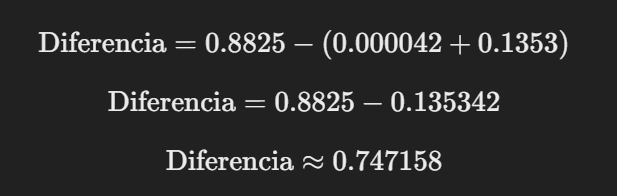